# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day


In [3]:
# df['target_num'] = df['target'].apply(lambda x: 0 if x == 'working_day' else 1)
X = df[['am', 'pm']]
y = df['target']
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)


LogisticRegression(fit_intercept=False, random_state=21)

In [4]:
a = -model.coef_[0][0] / model.coef_[0][1]
b = -model.intercept_[0] / model.coef_[0][1]

xx = np.linspace(min(df['am']), max(df['am']))
yy = a * xx + b

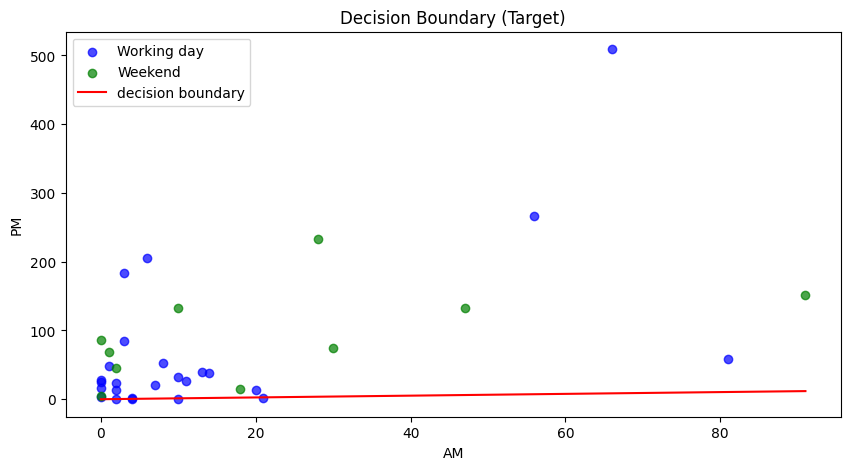

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x=df[df['target'] == 'working_day']['am'],
            y=df[df['target'] == 'working_day']['pm'],
            color='blue', alpha=0.7, label='Working day')

plt.scatter(x=df[df['target'] == 'weekend']['am'],
            y=df[df['target'] == 'weekend']['pm'],
            color='green', alpha=0.7, label='Weekend')

plt.plot(xx, yy, label='decision boundary', color = 'red')

plt.title('Decision Boundary (Target)')
plt.xlabel('AM')
plt.ylabel('PM')

plt.legend(loc='upper left')

plt.show()

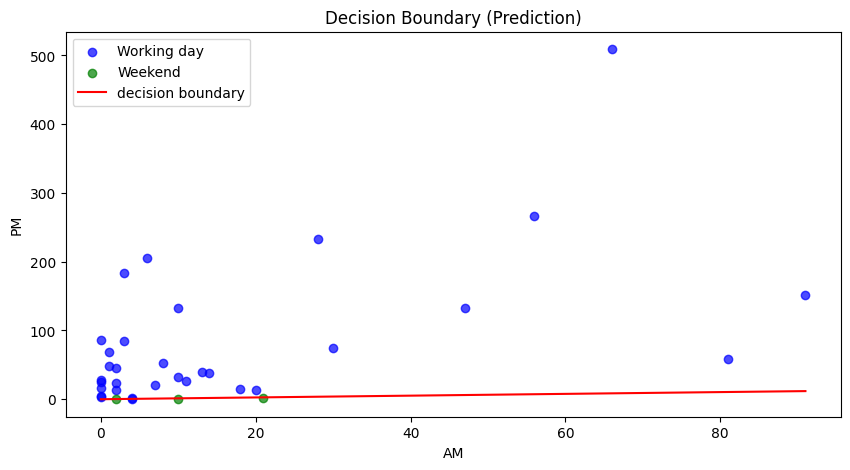

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(x=df[df['predict'] == 'working_day']['am'],
            y=df[df['predict'] == 'working_day']['pm'],
            color='blue', alpha=0.7, label='Working day')

plt.scatter(x=df[df['predict'] == 'weekend']['am'],
            y=df[df['predict'] == 'weekend']['pm'],
            color='green', alpha=0.7, label='Weekend')

plt.plot(xx, yy, label='decision boundary', color = 'red')

plt.title('Decision Boundary (Prediction)')
plt.xlabel('AM')
plt.ylabel('PM')

plt.legend(loc='upper left')

plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
df_sc = df.copy()
df_sc[['am', 'pm']] = scaler.fit_transform(X)

X = df_sc[['am', 'pm']].values
y = df_sc['target']

model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(X, y)

df_sc['predict'] = model_scaled.predict(X)

In [9]:
accuracy = accuracy_score(df_sc['target'], df_sc['predict'])
accuracy

0.7428571428571429

In [10]:
mode_class = df_sc['target'].mode()[0]
naive_predict = [mode_class] * len(df_sc)
naive_accuracy = accuracy_score(df_sc['target'], naive_predict)
naive_accuracy

0.7142857142857143

In [11]:
a = -model_scaled.coef_[0][0] / model_scaled.coef_[0][1]
b = -model_scaled.intercept_[0] / model_scaled.coef_[0][1]
xx = np.linspace(min(df_sc['am']), max(df_sc['am']))

yy = a  * xx + b

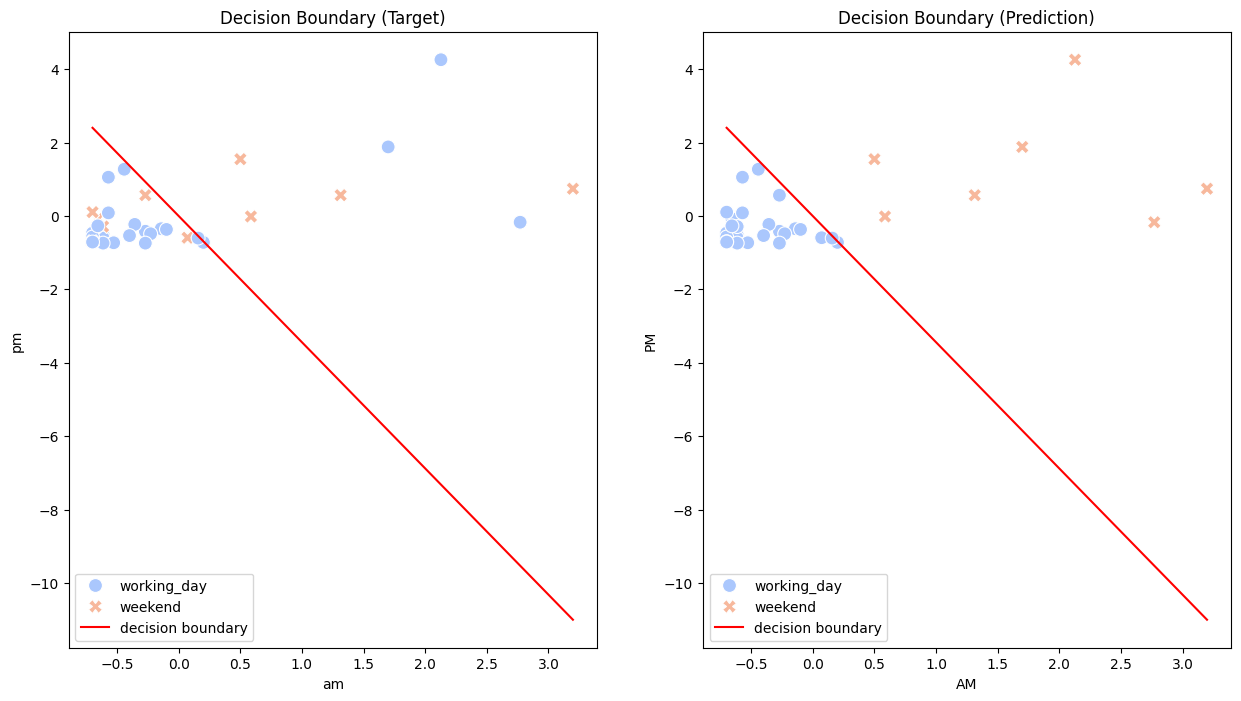

In [12]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='am', y='pm', hue='target', style='target', data=df_sc, palette='coolwarm', s=100)
plt.plot(xx, yy, label='decision boundary', color = 'red')
plt.legend(loc='lower left')
plt.title('Decision Boundary (Target)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='am', y='pm', hue='predict', style='predict', data=df_sc, palette='coolwarm', s=100)
plt.plot(xx, yy, label='decision boundary', color = 'red')
plt.legend(loc='lower left')
plt.title('Decision Boundary (Prediction)')

plt.xlabel('AM')
plt.ylabel('PM')

plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [13]:
svm_model = SVC(probability=True, random_state=21)
svm_model.fit(X_scaled, y)

SVC(probability=True, random_state=21)

In [14]:
svm_pred = svm_model.predict(X_scaled)
accuracy_score(y, svm_pred)

0.7428571428571429

In [15]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_accuracy = 0

for kernel in kernels:
    svm_model = SVC(kernel=kernel, probability=True, random_state=21)
    svm_model.fit(X_scaled, y)
    y_pred = svm_model.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    print(f"Точность SVC (kernel='{kernel}'): {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f"Лучший kernel: {best_kernel} с точностью {best_accuracy}")
best_svm_model = SVC(kernel=best_kernel, probability=True, random_state=21)
best_svm_model.fit(X_scaled, y)

Точность SVC (kernel='linear'): 0.7142857142857143
Точность SVC (kernel='poly'): 0.7428571428571429
Точность SVC (kernel='rbf'): 0.7428571428571429
Точность SVC (kernel='sigmoid'): 0.6857142857142857
Лучший kernel: poly с точностью 0.7428571428571429


SVC(kernel='poly', probability=True, random_state=21)

In [16]:
df_sc['predict'] = best_svm_model
df_sc['target'] = df_sc['target'].apply(lambda x: 0 if x == 'working_day' else 1)
df_sc['predict'] = df_sc['predict'].apply(lambda x: 0 if x == 'working_day' else 1)

In [17]:
y = df_sc['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
x_min, x_max = df_sc['am'].min() - 1, df_sc['am'].max() + 1
y_min, y_max = df_sc['pm'].min() - 1, df_sc['pm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid_points, columns=['am', 'pm'])
grid_points_scaled = scaler.transform(grid_df.values)

probabilities = svm_model.predict_proba(grid_points_scaled)
Z_prob_scaler = probabilities[:, 0].reshape(xx.shape)

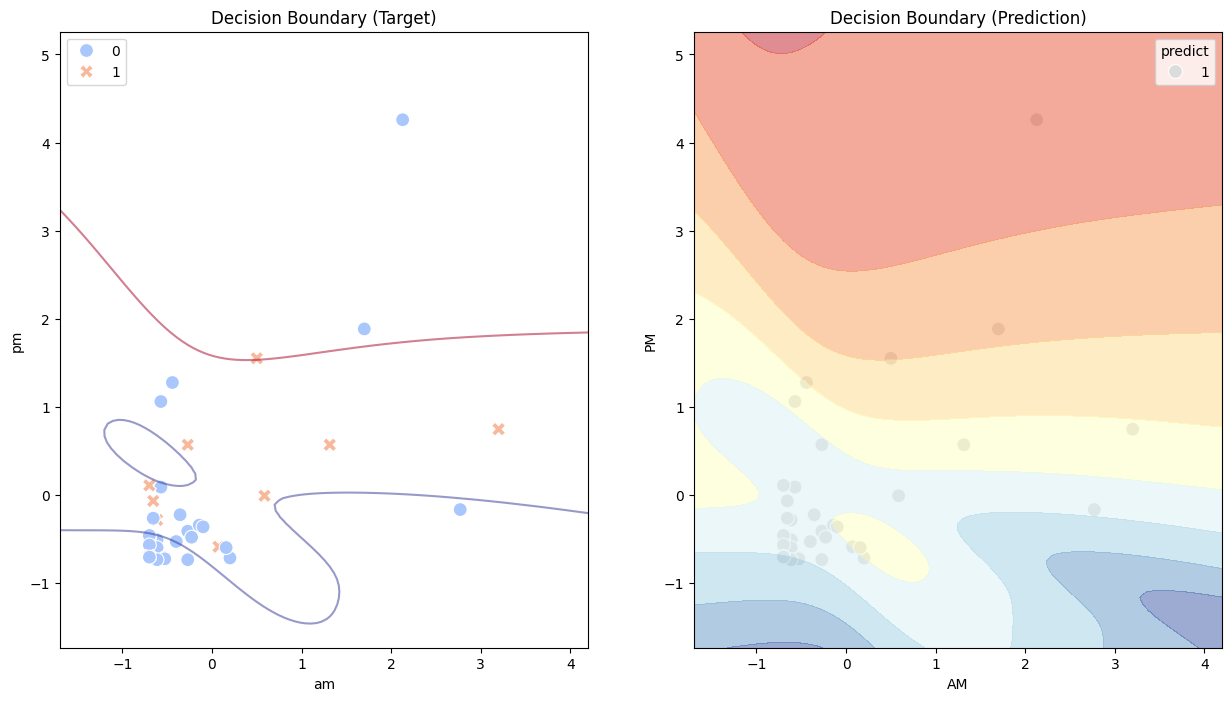

In [19]:
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='am', y='pm', hue='target', style='target', data=df_sc, palette='coolwarm', s=100)
plt.contour(xx, yy, Z_prob_scaler, alpha=0.5, cmap='RdYlBu', levels=[.2, .3])
plt.legend(loc='upper left')
plt.title('Decision Boundary (Target)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='am', y='pm', hue='predict', style='predict', data=df_sc, palette='coolwarm', s=100)
plt.contourf(xx, yy, Z_prob_scaler, alpha=0.5, cmap='RdYlBu')
plt.title('Decision Boundary (Prediction)')

plt.xlabel('AM')
plt.ylabel('PM')

plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [20]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_scaled, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
clf_pred = clf.predict(X_scaled)
df_sc['predict'] = clf_pred
accuracy_score(clf_pred, y)

0.9428571428571428

In [22]:
result = []
for max_depth in range(2, 7):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_scaled, y)
    pred = clf.predict(X_scaled)
    accuracy = accuracy_score(pred, y)
    result.append({'max_depth': max_depth, 'accuracy_score': accuracy})
result_df = pd.DataFrame(result)
result_df

,max_depth,accuracy_score
0,2,0.857143
1,3,0.885714
2,4,0.942857
3,5,0.971429
4,6,1.000000


In [23]:
probabilities = clf.predict_proba(grid_points_scaled)
Z_prob_scaler = probabilities[:, 0].reshape(xx.shape)

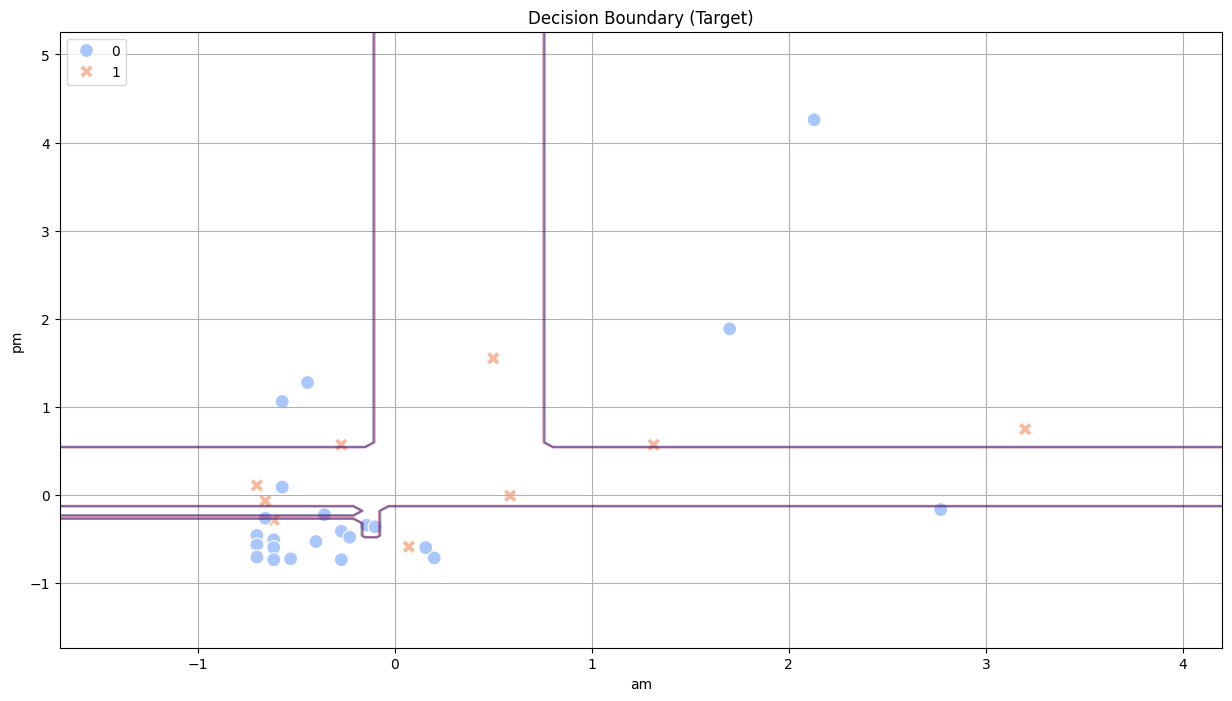

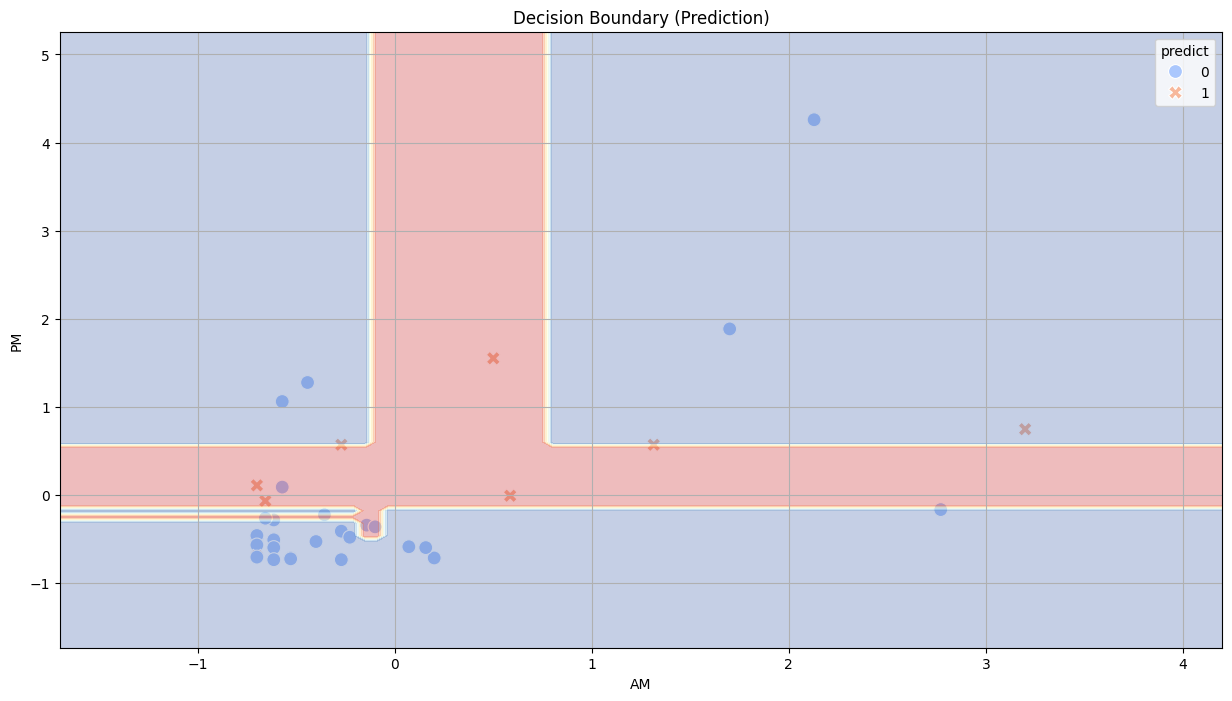

In [24]:
plt.figure(figsize=(15, 8))


sns.scatterplot(x='am', y='pm', hue='target', style='target', data=df_sc, palette='coolwarm', s=100)
plt.contour(xx, yy, Z_prob_scaler, alpha=0.5, cmap='RdYlBu', levels=[.2, .3])
plt.legend(loc='upper left')
plt.title('Decision Boundary (Target)')
plt.grid()

plt.figure(figsize=(15, 8))
sns.scatterplot(x='am', y='pm', hue='predict', style='predict', data=df_sc, palette='coolwarm', s=100)
plt.contourf(xx, yy, Z_prob_scaler, alpha=0.3, cmap='RdYlBu')
plt.title('Decision Boundary (Prediction)')
plt.grid()

plt.xlabel('AM')
plt.ylabel('PM')

plt.show()

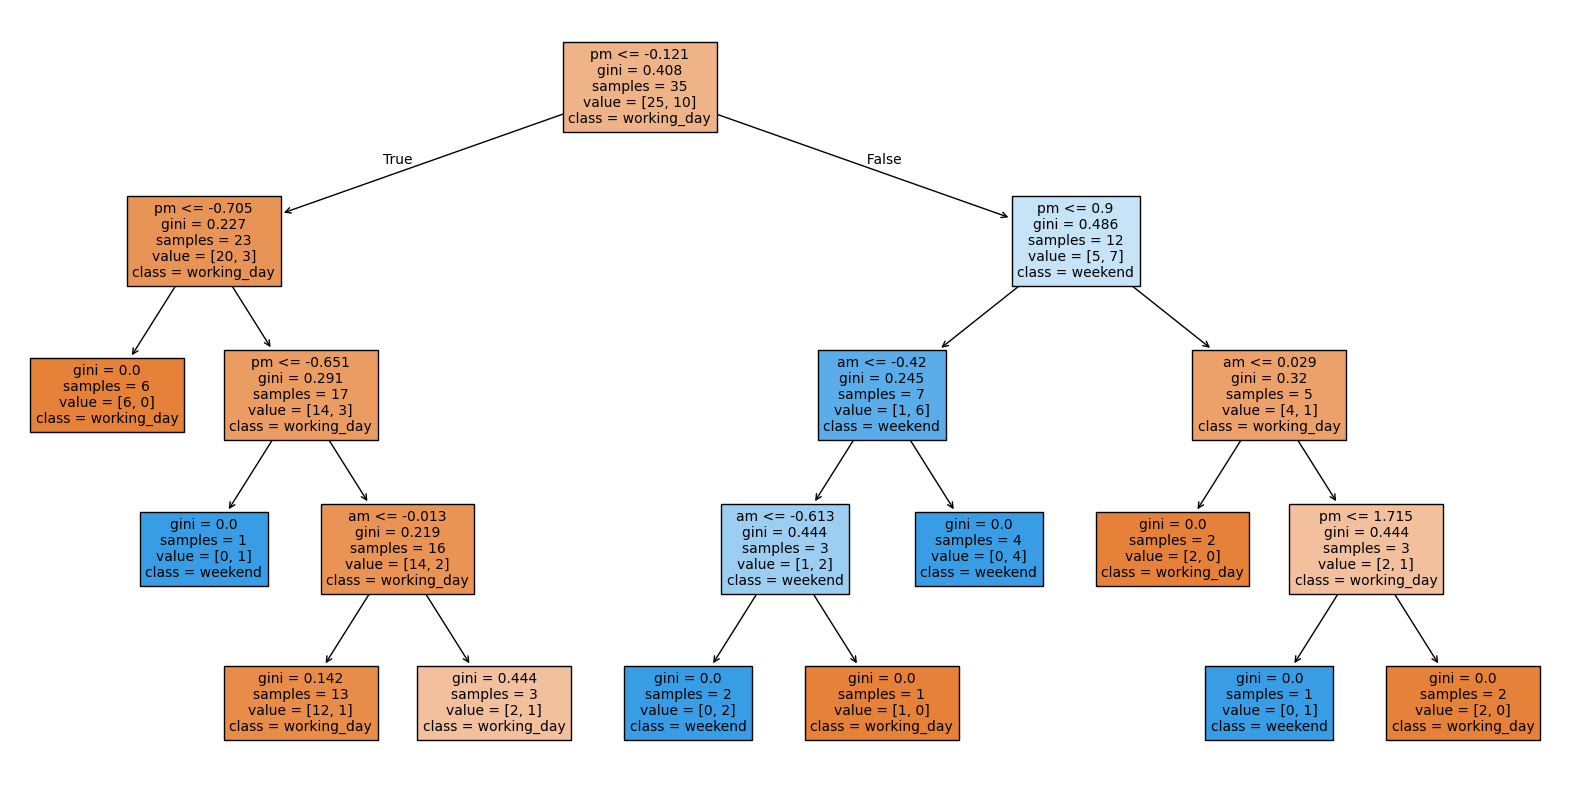

In [25]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 10))  # Размер фигуры (настройте по необходимости)
plot_tree(clf,
          feature_names=['am', 'pm'],  # Имена признаков
          class_names=['working_day', 'weekend'],  # Имена классов
          filled=True,  # Заливка цветом для классов
          fontsize=10)  # Размер шрифта
plt.show()

Answer - 4.